In [1]:
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
column_names = ['user_id','item_id','rating','timestamp']
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1. Movie Recommendation/ml-100k/u.data',sep='\t',names=column_names)
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
print(df["user_id"].nunique())
print(df['item_id'].nunique())

943
1682


In [ ]:
movies_title = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1. Movie Recommendation/ml-100k/u.item',sep="|",header = None, encoding='latin-1')
movies_title.head()
movies_title = movies_title[[0,1]]
movies_title.columns = ['item_id','title']
movies_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [ ]:
df =pd.merge(df,movies_title,on='item_id')


In [ ]:
df.tail()

,user_id,item_id,rating,timestamp,title
99995,880,476,3,880175444,"First Wives Club, The (1996)"
99996,716,204,5,879795543,Back to the Future (1985)
99997,276,1090,1,874795795,Sliver (1993)
99998,13,225,2,882399156,101 Dalmatians (1996)
99999,12,203,3,879959583,Unforgiven (1992)


###Expolatory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.groupby('title').mean()['rating'].sort_values(ascending=False).head()

,rating
title,
Aiqing wansui (1994),5.0
Entertaining Angels: The Dorothy Day Story (1996),5.0
Santa with Muscles (1996),5.0
Prefontaine (1997),5.0
They Made Me a Criminal (1939),5.0


In [ ]:
df.groupby('title').count().head()

,user_id,item_id,rating,timestamp
title,,,,
'Til There Was You (1997),9,9,9,9
1-900 (1994),5,5,5,5
101 Dalmatians (1996),109,109,109,109
12 Angry Men (1957),125,125,125,125
187 (1997),41,41,41,41


In [ ]:
ratings = pd.DataFrame(df.groupby('title').mean()['rating'])

In [ ]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title').count()['rating'])

In [ ]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


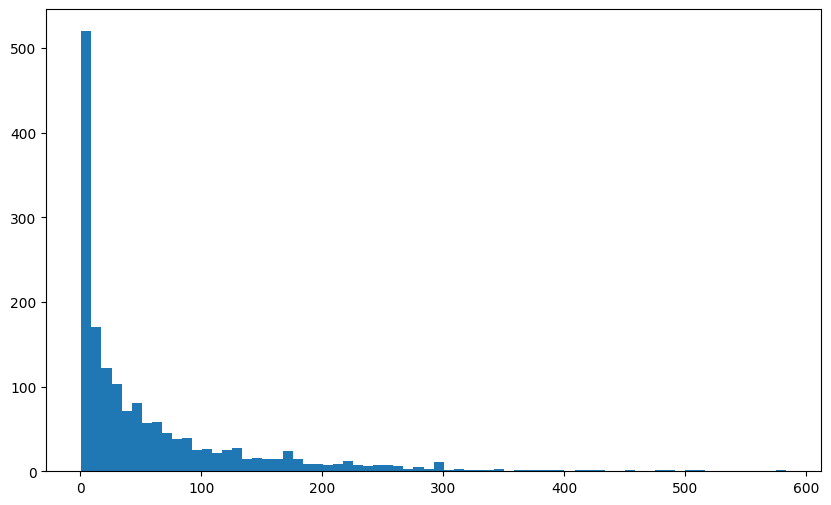

In [ ]:
plt.figure(figsize = (10,6))
plt.hist(ratings['num of ratings'],bins = 70)
plt.show()

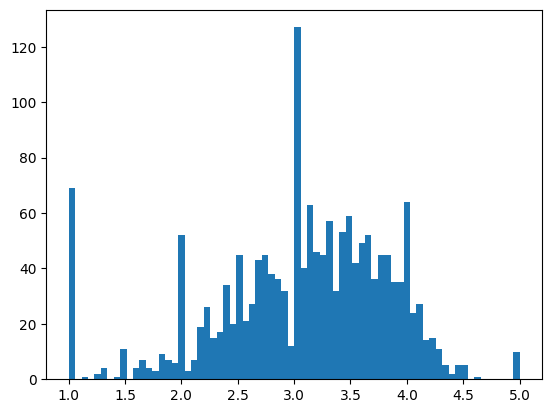

In [ ]:
plt.hist(ratings['rating'],bins = 70)
plt.show()

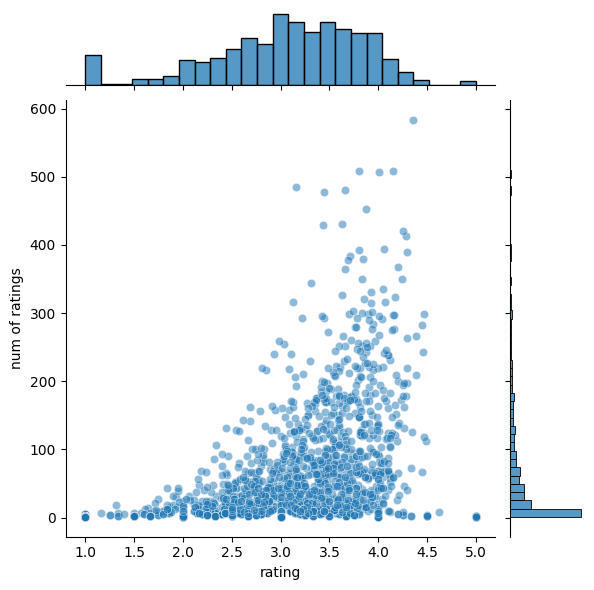

In [ ]:
sns.jointplot(x='rating',y='num of ratings',data = ratings,alpha = 0.5)

In [ ]:
moviemt = df.pivot_table(index='user_id',columns = 'title',values='rating')

In [ ]:
moviemt.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [ ]:
starwars_user_rating = moviemt['Star Wars (1977)']
starwars_user_rating.head()

,Star Wars (1977)
user_id,
1,5.0
2,5.0
3,NaN
4,5.0
5,4.0


In [ ]:
# prompt: code to avoid warnings error

import warnings
warnings.filterwarnings('ignore')
similar_to_starwars=moviemt.corrwith(starwars_user_rating)

In [ ]:
similar_to_starwars.sort_values(ascending=False)

,0
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
No Escape (1994),1.0
Man of the Year (1995),1.0
Cosi (1996),1.0
...,...
Wonderland (1997),NaN
"Wooden Man's Bride, The (Wu Kui) (1994)",NaN
Yankee Zulu (1994),NaN


In [ ]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['correlation'])

In [ ]:
corr_starwars.dropna(inplace=True)

In [ ]:
corr_starwars.sort_values('correlation',ascending=False).head(12)

,correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
No Escape (1994),1.0
Man of the Year (1995),1.0
Cosi (1996),1.0
Commandments (1997),1.0
Golden Earrings (1947),1.0
"Scarlet Letter, The (1926)",1.0
Safe Passage (1994),1.0


In [ ]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

,correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [ ]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('correlation',ascending=False)

,correlation,num of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [ ]:
def predict(movie_name):
  movie_user_rating = moviemt[movie_name]
  similar_to_movie=moviemt.corrwith(movie_user_rating)
  corr_movie = pd.DataFrame(similar_to_movie,columns=['correlation'])
  corr_movie.dropna(inplace=True)
  corr_movie = corr_movie.join(ratings['num of ratings'])
  predictions = corr_movie[corr_movie['num of ratings']>100].sort_values('correlation',ascending=False)
  return predictions

In [ ]:
predict('Return of the Jedi (1983)').head(10)

,correlation,num of ratings
title,,
Return of the Jedi (1983),1.000000,507
"Empire Strikes Back, The (1980)",0.721229,367
Star Wars (1977),0.672556,583
Raiders of the Lost Ark (1981),0.467391,420
Indiana Jones and the Last Crusade (1989),0.422294,331
Sneakers (1992),0.412559,150
Back to the Future (1985),0.411901,350
"Frighteners, The (1996)",0.391322,115
True Lies (1994),0.364536,208
